In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from copy import deepcopy
from operator import index
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# done by us
from auxFunctions import *

In [16]:
df = pd.read_csv('Proj1_Dataset.csv')

for feature in df.columns:
  df = df[df[feature].notna()]
  
df_features = df.drop(['Date','Time','Persons'], axis=1)

df_output = df['Persons']


# Z-Score

In [17]:
standard = StandardScaler().fit_transform(df_features.values)

project_df = pd.DataFrame(standard, index=df_features.index, columns=df_features.columns)


# Temperature

/tmp/ipykernel_272964/1429151312.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_272964/1429151312.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


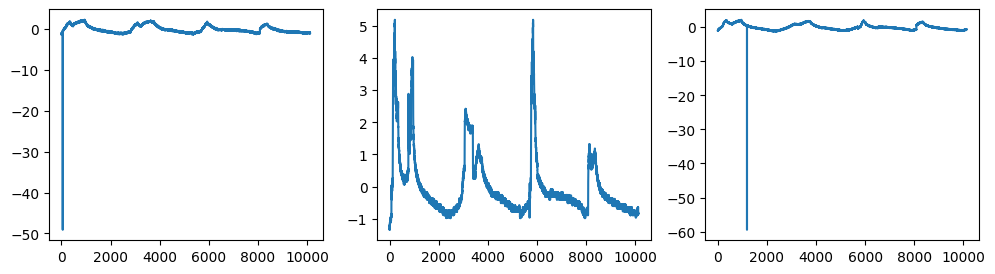

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Temp.plot()
plt.subplot(1,3,2)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Temp.plot(ax=plt.gca())
plt.show()

# Light

/tmp/ipykernel_272964/955311149.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_272964/955311149.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


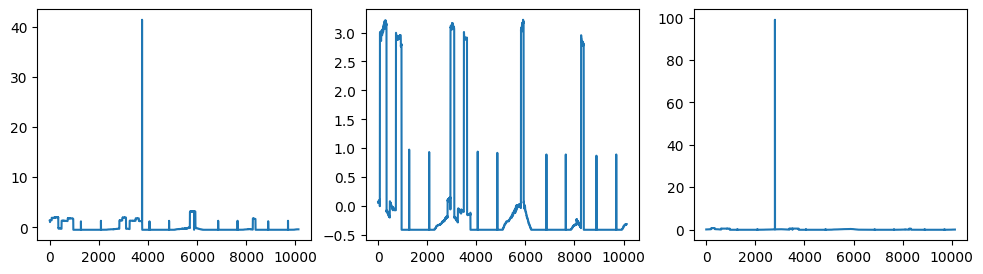

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Light.plot()
plt.subplot(1,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Light.plot(ax=plt.gca())
plt.show()

# CO2

<AxesSubplot: >

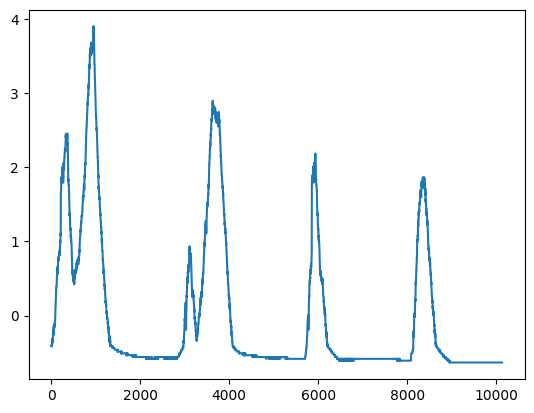

In [20]:
project_df['CO2'].plot()

# PIR

/tmp/ipykernel_272964/3791813093.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_272964/3791813093.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


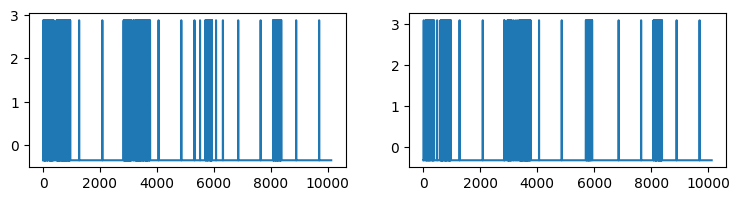

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(9, 2))
plt.subplot(1,2,1)
project_df.PIR1.plot()
plt.subplot(1,2,2)
project_df.PIR2.plot(ax=plt.gca())
plt.show()

# Removing Basic Outliers

[41.40342080639325]
[98.93841182491872]
[-49.122432060418475]
[-59.46824156885202]


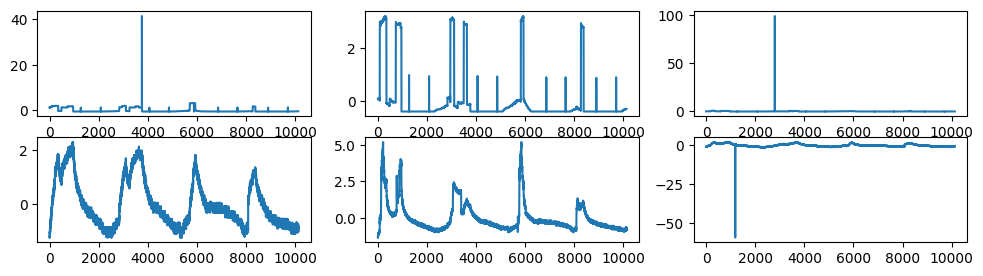

In [22]:
indexes, outlier = detectSamples(project_df['S1Light'], 4)
new_project_df = removeLine(project_df, indexes=indexes)
df_output = df_output.drop(indexes)
print(outlier)

indexes, outlier = detectSamples(project_df['S3Light'], 4)
new_project_df = removeLine(new_project_df, indexes=indexes)
df_output = df_output.drop(indexes)
print(outlier)

indexes ,outlier = detectSamples(project_df['S1Temp'], 4)
new_project_df = removeLine(new_project_df, indexes=indexes)
df_output = df_output.drop(indexes)
print(outlier)

indexes ,outlier = detectSamples(project_df['S3Temp'], 4)
new_project_df = removeLine(new_project_df, indexes=indexes)
df_output = df_output.drop(indexes)
print(outlier)

# FIGURE
fig, axs = plt.subplots(2, 3, figsize=(12, 3))
# LIGHT
plt.subplot(2,3,1)
new_project_df.S1Light.plot()
plt.subplot(2,3,2)
new_project_df.S2Light.plot(ax=plt.gca())
plt.subplot(2,3,3)
new_project_df.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(2,3,4)
new_project_df.S1Temp.plot()
plt.subplot(2,3,5)
new_project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(2,3,6)
new_project_df.S3Temp.plot(ax=plt.gca())
plt.show()


# Analysis

In [130]:
print(np.argwhere(np.isnan(X)))
print(new_project_df.loc[279])
print(X[278])

[[ 278    1]
 [3680    6]
 [4567    1]
 [6457    0]]
S1Temp     1.358992
S2Temp          NaN
S3Temp     1.649603
S1Light    2.023445
S2Light    3.218746
S3Light    0.721463
CO2        2.061439
PIR1       2.879698
PIR2       3.097610
Name: 279, dtype: float64
[1.55184423        nan 2.03752155 2.22439392 3.21808237 4.01506766
 2.06207277 2.88202467 3.09872462]


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

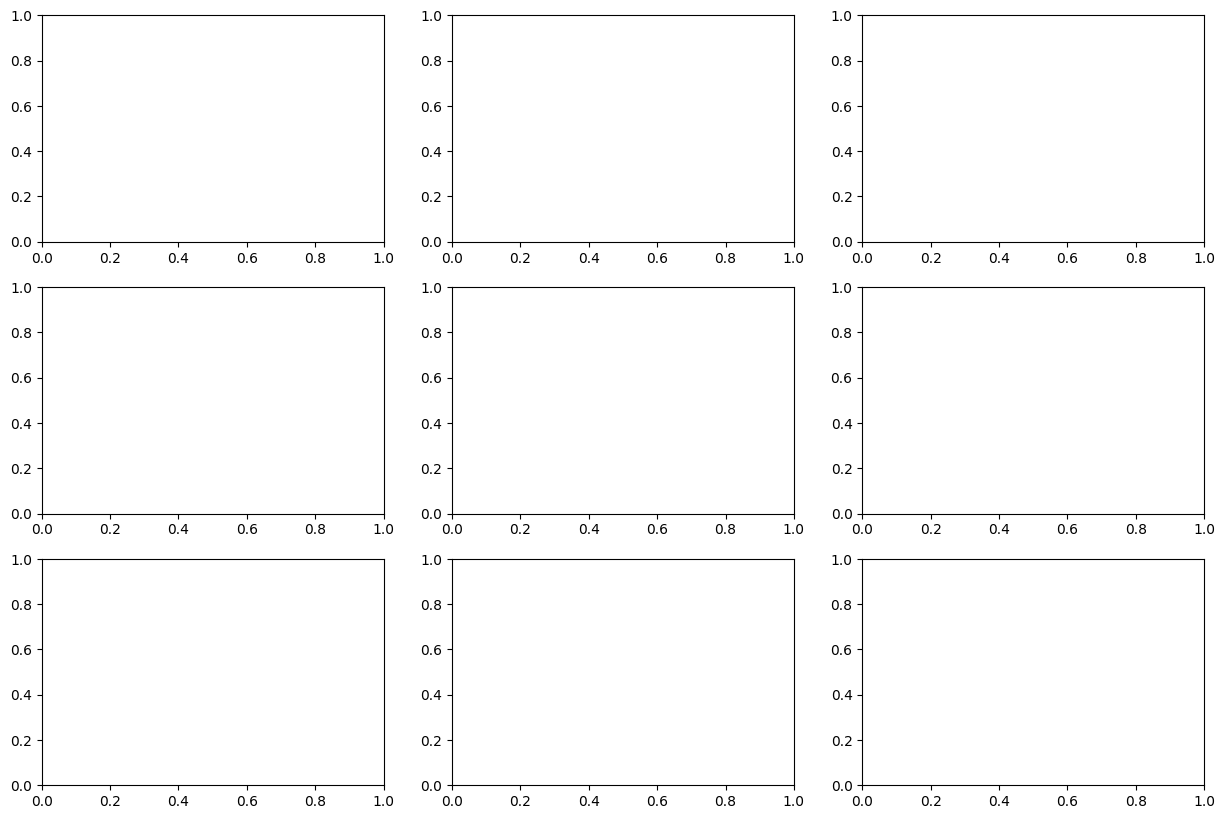

In [131]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),  # type: ignore
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # type: ignore
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# preprocess dataset, split into training and test part
X = new_project_df.to_numpy()
y = output.to_numpy()

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for name, clf, ax in zip(names, classifiers, axes.flatten()): # type: ignore
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues, ax=ax)
    
    ax.title.set_text(name)
    
    print(name)
    print()
    print(classification_report(y_test, y_pred))
    print()

plt.tight_layout()
plt.show()
